## 문제 05
iris.csv파일을 읽고 SepalLength,SepalWidth,PetalLength 열로 PetalWidth 를 예측하는 ANN 모델을 생성하세요. <br/>
(입력계층, 출력 계층이 있는 모델과 입력계층, 은닉계층1, 출력 계층이 있는 모델, 두 모델의 성능을 비교 하세요.)

In [1]:
from tensorflow.keras import layers, models
from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import pandas as pd
iris = pd.read_csv('iris.csv')

In [3]:
X = iris.iloc[:, 0:3]
Y = iris.iloc[:, 3]

X_train = X[:100]
Y_train = Y[:100]
X_test = X[100:]
Y_test = Y[100:]

In [4]:
def without_layer(X_train,Y_train,X_test,Y_test):
    model = models.Sequential()
    model.add(keras.layers.Dense(1, input_shape=(3,)))
    model.compile('SGD', 'mse')
    
    history = model.fit(X_train, 
                        Y_train, 
                        epochs = 100, 
                        batch_size=100,
                        validation_split = 0.2, 
                        verbose=0
                       )
    
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performace_test))

    history = history.history
    print_info(history)

In [5]:
def with_layer(X_train,Y_train,X_test,Y_test, Nh = 20):
    model = models.Sequential()
    model.add(keras.layers.Dense(Nh, activation='relu', input_shape=(3,)))
    model.add(layers.Dense(1, activation='relu'))
    model.compile(loss='mse', optimizer='sgd')
    
    history = model.fit(X_train, 
                        Y_train, 
                        epochs = 100, 
                        batch_size=100,
                        validation_split = 0.2, 
                        verbose=0
                       )
    
    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performace_test))

    history = history.history
    print_info(history)

In [6]:
def print_info(history):
    """Cost/Loss  변화 추이 그래프"""
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()




1/1 [==============================] - 0s 29ms/step - loss: 0.0915

Test Loss -> 0.09


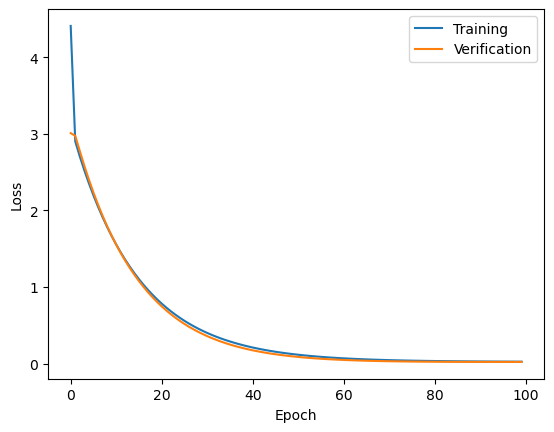

In [7]:
without_layer(X_train,Y_train,X_test,Y_test)

1/1 [==============================] - 0s 16ms/step - loss: 4.1786

Test Loss -> 4.18


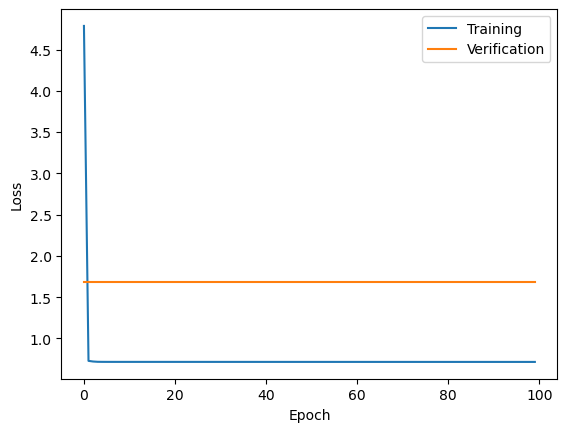

In [8]:
with_layer(X_train,Y_train,X_test,Y_test, 10)

1/1 [==============================] - 0s 31ms/step - loss: 4.1786

Test Loss -> 4.18


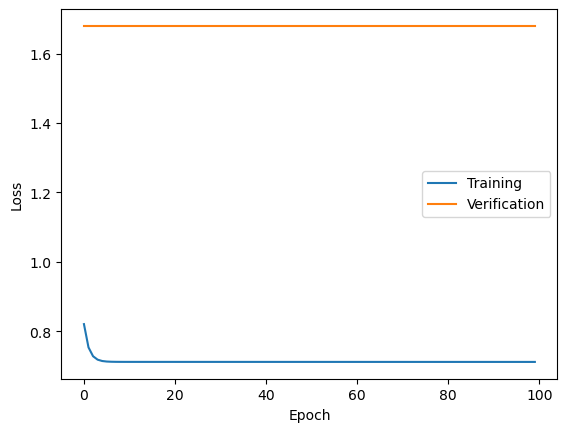

In [9]:
with_layer(X_train,Y_train,X_test,Y_test, 15)

1/1 [==============================] - 0s 31ms/step - loss: 0.1503

Test Loss -> 0.15


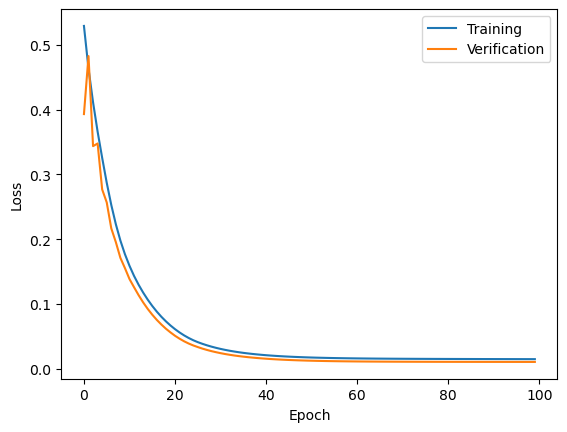

In [10]:
with_layer(X_train,Y_train,X_test,Y_test, 30)